In [65]:
import pandas as pd

from matplotlib import pyplot as plt


# Veri dosyasını yükleyin
train_df = pd.read_parquet('sentiment_train_0000.parquet')
test_df = pd.read_parquet('sentiment_test_0000.parquet')
validate_df = pd.read_parquet('sentiment_validation_0000.parquet')

print(train_df.head())
print(test_df.head())
print(validate_df.head())

                                                text  label
0  "QT @user In the original draft of the 7th boo...      2
1  "Ben Smith / Smith (concussion) remains out of...      1
2  Sorry bout the stream last night I crashed out...      1
3  Chase Headley's RBI double in the 8th inning o...      1
4  @user Alciato: Bee will invest 150 million in ...      2
                                                text  label
0  @user @user what do these '1/2 naked pics' hav...      1
1  OH: “I had a blue penis while I was this” [pla...      1
2  @user @user That's coming, but I think the vic...      1
3  I think I may be finally in with the in crowd ...      2
4  @user Wow,first Hugo Chavez and now Fidel Cast...      0
                                                text  label
0  Dark Souls 3 April Launch Date Confirmed With ...      1
1  "National hot dog day, national tequila day, t...      2
2  When girls become bandwagon fans of the Packer...      0
3  @user I may or may not have searched 

In [66]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Number Filter
    text = ' '.join(word for word in text.split() if not any(c.isdigit() for c in word))

    # Punctuation Erasure
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # N Char Filter
    n_value = 3
    text = ' '.join(word for word in text.split() if len(word) >= n_value)

    # Case converter
    text = text.lower()

    # Stop word filter
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Snowball stemmer
    stemmer = SnowballStemmer('english')
    #text = ' '.join(stemmer.stem(word) for word in text.split())

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
# Apply the preprocessing function to the 'text' column
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)
validate_df['processed_text'] = validate_df['text'].apply(preprocess_text)

In [69]:
print(train_df["processed_text"][0])
print(test_df["processed_text"][0])

user original draft book remus lupin survived battle hogwarts happybirthdayremuslupin
user user naked pics anything theyre even like


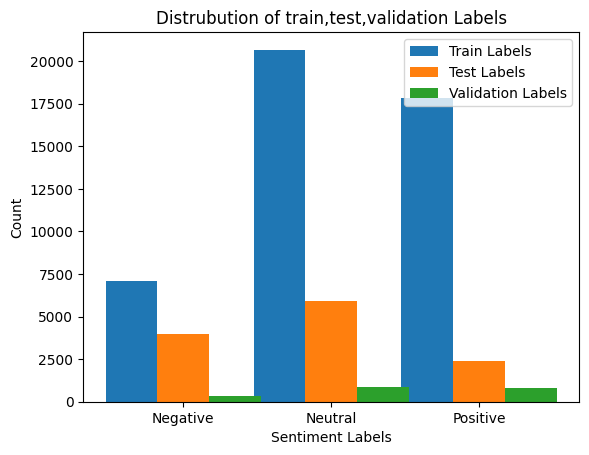

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'df' DataFrame with 'label', 'predicted_label', and 'scoren_label' columns

# Gerçek etiketlerin ve tahmin edilen etiketlerin dağılımını oluşturma
labels = ['Negative', 'Neutral', 'Positive']
train_counts = train_df['label'].value_counts().reindex([0, 1, 2], fill_value=0)
test_counts = test_df['label'].value_counts().reindex([0, 1, 2], fill_value=0)
validate_counts = validate_df['label'].value_counts().reindex([0, 1, 2], fill_value=0)

# Çubuk grafik oluşturma
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, train_counts, bar_width, label='Train Labels')
bar2 = ax.bar(index + bar_width, test_counts, bar_width, label='Test Labels')
bar3 = ax.bar(index + 2 * bar_width, validate_counts, bar_width, label='Validation Labels')

ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Count')
ax.set_title('Distrubution of train,test,validation Labels')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

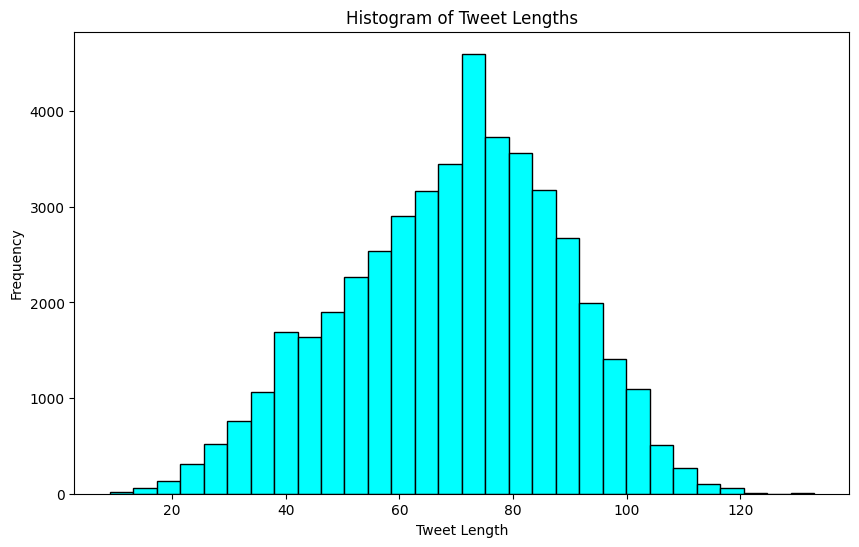

In [8]:
import matplotlib.pyplot as plt

# Assuming 'text' is the column containing the tweet text in your DataFrame
train_df['tweet_length'] = train_df['processed_text'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(train_df['tweet_length'], bins=30, color='cyan', edgecolor='black')
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


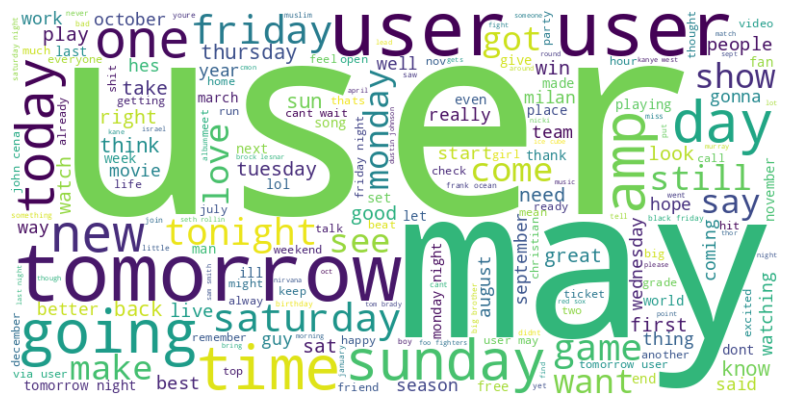

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' is the column containing the tweet text in your DataFrame
text_data = train_df['processed_text'].dropna().tolist()

# Combine all the text into a single string
all_text = ' '.join(text_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


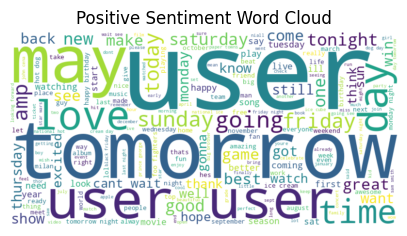

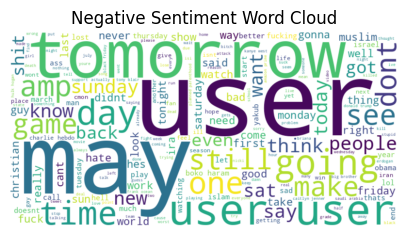

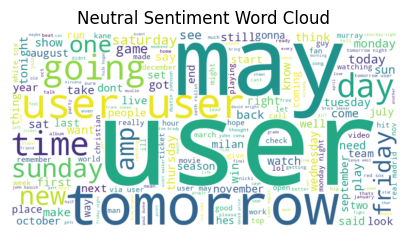

In [10]:
from wordcloud import WordCloud

# Create separate DataFrames for each sentiment class
positive_tweets = train_df[train_df['label'] == 2]['processed_text'] #positive
negative_tweets = train_df[train_df['label'] == 0]['processed_text'] #negative
neutral_tweets = train_df[train_df['label'] == 1]['processed_text'] #neutral

# Generate word clouds for each sentiment class
def generate_word_cloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(positive_tweets, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_tweets, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_tweets, 'Neutral Sentiment Word Cloud')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


#X = df['text']
#y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_df['processed_text'],test_df['processed_text'],train_df['label'],test_df['label']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
svm_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_pred)
report = classification_report(y_test, svm_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)



Accuracy: 0.5752197981113644
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.33      0.43      3972
           1       0.57      0.77      0.66      5937
           2       0.53      0.50      0.51      2375

    accuracy                           0.58     12284
   macro avg       0.58      0.53      0.53     12284
weighted avg       0.59      0.58      0.56     12284



In [77]:
# Confusion matrix'i oluştur ve görselleştir
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
disp.plot(cmap='Blues', values_format=".4g")
plt.title('Confusion Matrix')
plt.show()

NameError: name 'svm_pred' is not defined

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


#X = df['processed_text']
#y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_df['processed_text'],test_df['processed_text'],train_df['label'],test_df['label']

# Vectorize the preprocessed text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.48787040052100294
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.09      0.15      3972
           1       0.50      0.84      0.63      5937
           2       0.39      0.27      0.32      2375

    accuracy                           0.49     12284
   macro avg       0.48      0.40      0.37     12284
weighted avg       0.49      0.49      0.41     12284



In [1]:
!pip install datasets
from datasets import load_dataset
from transformers import AutoTokenizer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Load the dataset
dataset = load_dataset("tweet_eval", "sentiment")  # Replace "your_dataset_name" with the actual name of your dataset



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [31]:
train=pd.DataFrame(dataset["train"])
print(train.head(10))

                                                text  label
0  "QT @user In the original draft of the 7th boo...      2
1  "Ben Smith / Smith (concussion) remains out of...      1
2  Sorry bout the stream last night I crashed out...      1
3  Chase Headley's RBI double in the 8th inning o...      1
4  @user Alciato: Bee will invest 150 million in ...      2
5  @user LIT MY MUM 'Kerry the louboutins I wonde...      2
6  "\"""" SOUL TRAIN\"""" OCT 27 HALLOWEEN SPECIA...      2
7  So disappointed in wwe summerslam! I want to s...      0
8  "This is the last Sunday w/o football .....,NF...      2
9  @user @user CENA & AJ sitting in a tree K-I-S-...      1


In [32]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [33]:
count=0
for i in train['text']:
    if count==5:
        break
    print(i)
    print()
    count+=1

"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"

"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ"

Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night.

Chase Headley's RBI double in the 8th inning off David Price snapped a Yankees streak of 33 consecutive scoreless innings against Blue Jays

@user Alciato: Bee will invest 150 million in January, another 200 in the Summer and plans to bring Messi by 2017"



In [35]:
#Finding out the composition of  positive,neutral and the negative tweets.
train['label'].value_counts()

1    20673
2    17849
0     7093
Name: label, dtype: int64

In [36]:
!pip3 install contractions
import contractions
from tqdm import tqdm
#tqdm package is used to track the progress of work. It displays the percentage of loop done.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.7 MB/s eta 0:00:00


In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not'
print('not' in stopwords)
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')
print('not' in stopwords)

True
False


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
import re
processed_tweets=[]
for i in tqdm(train['text']):
    #Expanding all the contractions present in the review to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    i=re.sub('\d+',"",i)
    #Making all the review text to be of lower case as well as remvoing the stopwords and words of length less than 3
    processed_tweets.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

100%|██████████| 45615/45615 [00:08<00:00, 5695.86it/s]


In [39]:
#Creating a new datafram using the Processed Reviews
processed_df=pd.DataFrame({'text':processed_tweets,'label':list(train['label'])})

In [40]:
processed_df.head()

,text,label
0,user original draft book remus lupin survived ...,2
1,ben smith smith concussion remains lineup thur...,1
2,sorry bout stream last night crashed tonight s...,1
3,chase headleys rbi double inning david price s...,1
4,user alciato bee invest million january anothe...,2


In [42]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X=processed_df['text']
Y=processed_df['label']

In [43]:
#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.33)
#when stratify is provided the splitting of data into train and test datasets agree with the composition of actual possitive and negative reviews present in the dataset

In [44]:
def print_shape(a,b):
    """
    Function that prints the shape of the numpy arrays passed as arguments
    """
    print("Size of Training Samples")
    print("="*30)
    print(a.shape)
    print("Size of Testing Samples")
    print("="*30)
    print(b.shape)
print_shape(x_train,x_test)

Size of Training Samples
(30562,)
Size of Testing Samples
(15053,)


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer is used to implement BagOfWords techniqe using which the textual data can be converted to numerical data so that it can be used for computation.
vectorizer=CountVectorizer()
x_train_bow=vectorizer.fit_transform(x_train)
x_test_bow=vectorizer.transform(x_test)
print_shape(x_train_bow,x_test_bow)

Size of Training Samples
(30562, 37905)
Size of Testing Samples
(15053, 37905)


In [47]:
#The total number of features that are recognized by Count Vectorizer. In other words this also refers to total number of unique words present in the corpus.
len(list(vectorizer.get_feature_names_out()))

37905

In [49]:
#Displaying the first 100 features of BagofWords Vector
count=0
for i in list(vectorizer.get_feature_names_out()):
    if count==100:
        break
    print(i,end=",")
    count+=1

aaa,aaaa,aaaaaah,aaaaaahhhhh,aaaaaand,aaaaah,aaaaahhhhh,aaaalllll,aaaggghhh,aaah,aaahuc,aaand,aac,aacta,aactas,aah,aales,aalim,aaliyah,aaliyahs,aaliyahus,aalllll,aameen,aami,aamir,aamiri,aamirkhan,aaom,aap,aapl,aapwithterrorists,aardwolf,aaron,aaronuc,aau,aauc,abandoned,abandonment,abarth,abba,abbas,abbey,abbeyuc,abbi,abbott,abbottabad,abbottag,abbotts,abbreviated,abbreviation,abby,abc,abcchicago,abceyewitness,abcnbc,abcs,abcuc,abd,abdc,abducted,abdul,abdulhamid,abdullah,abdulrazaq,abebti,abel,abercrombie,abhi,abhiyaan,abhiyan,abi,abid,abiding,abigail,ability,abilityi,abit,abj,ablaz,able,ablett,abnormal,aboard,abod,abolish,abolishing,abominable,abort,aborted,abortion,abortionist,abortions,abosheshey,abou,aboud,about,abouttime,abouut,above,abraham,

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have x_train_bow and y_train defined

# Define the parameter grid for RandomizedSearchCV
grid_params = {
    'n_neighbors': [40, 50, 60, 70, 80, 90],
    'metric': ['manhattan']
}

# Create a KNeighborsClassifier
knn = KNeighborsClassifier()

# Create a RandomizedSearchCV object
clf = RandomizedSearchCV(
    knn,
    grid_params,
    scoring='accuracy',  # Specify the scoring metric
    n_iter=10,           # Number of random combinations to try
    random_state=0,
    n_jobs=-1,
    verbose=1
)

# Fit the RandomizedSearchCV object to the training data
clf.fit(x_train_bow, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", clf.best_params_)

# Print the accuracy of the best model
print("Best Accuracy:", clf.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_neighbors': 40, 'metric': 'manhattan'}
Best Accuracy: 0.4992475588459236


In [57]:
#The parameters of the best model
clf.best_params_

{'n_neighbors': 40, 'metric': 'manhattan'}

In [58]:
#The Score of the best model
clf.best_score_

0.4992475588459236

In [59]:
#Displaying the complete result of RandomizedSearchCV
clf.cv_results_

{'mean_fit_time': array([0.01424317, 0.01352386, 0.01549273, 0.01550984, 0.0099359 ,
        0.01583772]),
 'std_fit_time': array([0.0010686 , 0.00207666, 0.0036833 , 0.00192905, 0.00194666,
        0.00841521]),
 'mean_score_time': array([39.79255533, 37.93555984, 37.78031583, 37.35492721, 37.81766829,
        37.59015284]),
 'std_score_time': array([2.97312517, 1.28758887, 0.73999323, 1.0162771 , 1.0511421 ,
        1.13387183]),
 'param_n_neighbors': masked_array(data=[40, 50, 60, 70, 80, 90],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_metric': masked_array(data=['manhattan', 'manhattan', 'manhattan', 'manhattan',
                    'manhattan', 'manhattan'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 40, 'metric': 'manhattan'},
  {'n_neighbors': 50, 'metric': 'manhattan'},
  {'n_neighbors': 60, 'metric':

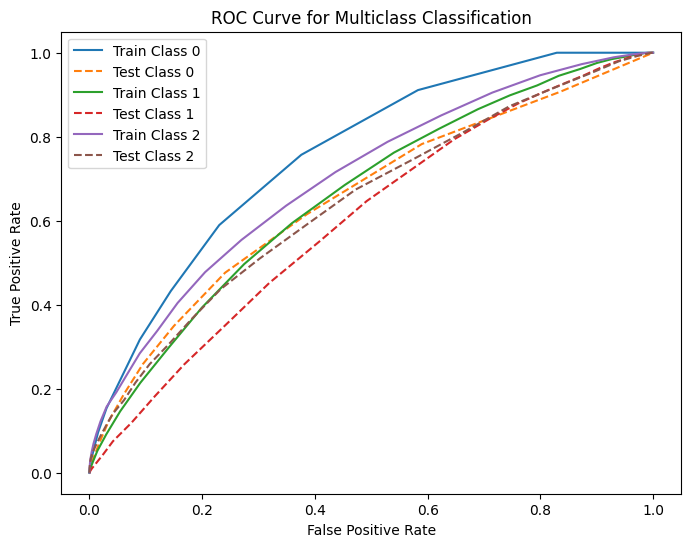

In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train and y_test are your multiclass labels
# Binarize the labels
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize your classifier (clf) here if you haven't already

# Assuming x_train_bow and x_test_bow are your feature matrices
# Train the classifier (clf) here if you haven't already

# Initialize variables for ROC curve
n_classes = len(np.unique(y_train))
train_fpr = dict()
train_tpr = dict()
test_fpr = dict()
test_tpr = dict()

# Compute ROC curve for each class
for i in range(n_classes):
    train_fpr[i], train_tpr[i], _ = roc_curve(y_train_bin[:, i], clf.predict_proba(x_train_bow)[:, i])
    test_fpr[i], test_tpr[i], _ = roc_curve(y_test_bin[:, i], clf.predict_proba(x_test_bow)[:, i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(train_fpr[i], train_tpr[i], label=f'Train Class {i}')
    plt.plot(test_fpr[i], test_tpr[i], label=f'Test Class {i}', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()


<Axes: >

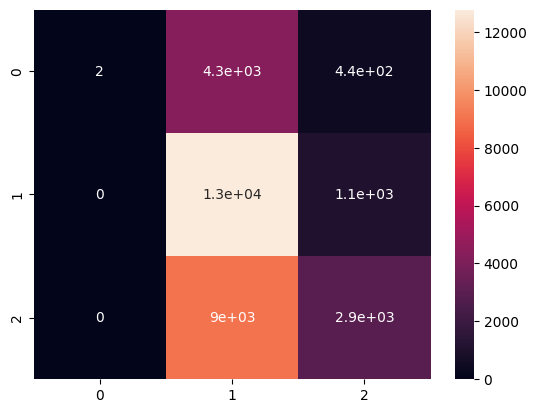

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train_bow)),annot=True)

<Axes: >

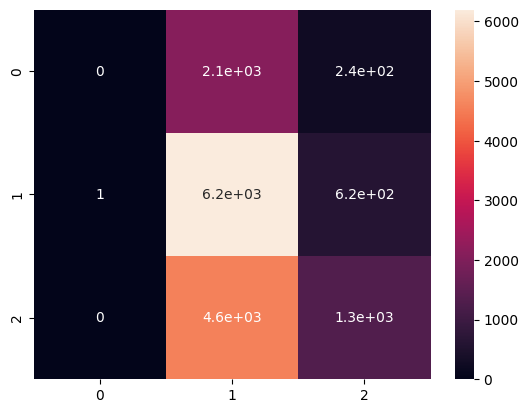

In [60]:
sns.heatmap(confusion_matrix(y_test,clf.predict(x_test_bow)),annot=True)

In [70]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_df["tokenized_text"]=train_df['processed_text'].apply(tokenizer.tokenize)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [71]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
import numpy as np
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer


def penn_to_wn(tag):

    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

lemmatizer = WordNetLemmatizer()
# NLTK veri setlerini ve stopword listesini indirme
nltk.download('sentiwordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
# Stopword listesini yükleme
#stop_words = set(stopwords.words('english'))

def get_score(tweet):
    scored_tokens=[]
    #tokens = word_tokenize(tweet)
    #tagged = pos_tag(tokens)
    tagged = pos_tag(tweet)

    pos_score, neg_score, token_count = 0, 0, 0

    for word, tag in tagged:


        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue

        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue

        synsets = list(swn.senti_synsets(lemma, pos=wn_tag))
        if not synsets:
            continue

        # Ortalama duygu skorlarını al
        synset = synsets[0]
        pos_score += synset.pos_score()
        neg_score += synset.neg_score()
        token_count += 1

    if token_count == 0:
        return [0, 0]  # Eğer uygun kelime yoksa nötr skor döndür

    return [pos_score / token_count, neg_score / token_count]


train_df["getscore"]=train_df["tokenized_text"].apply(get_score)
#print(df[["getscore","label"]])

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
train_df[['positive_score', 'negative_score']] = pd.DataFrame(train_df['getscore'].tolist(), index=train_df.index)
train_df["scoren"]=train_df['positive_score']-train_df['negative_score']





def predict_sentiment(cluster_label):
    # Örnek bir ilişkilendirme: 0 kümesi negatif, 1 kümesi nötr, 2 kümesi pozitif
    if cluster_label >= 0.2:
        return 2
    if cluster_label == 0:
        return 1
    if cluster_label < 0:
        return 0

# Duygu durumu tahminlerini DataFrame'e ekleme
train_df['scoren_label'] = train_df['scoren'].apply(predict_sentiment)

# Doğruluk oranını hesapla
accuracy = accuracy_score(train_df['label'], train_df['scoren_label'])
print(f"\nsentiwordnet ile Doğruluk Oranı: {accuracy:.2f}\n")

# Confusion matrix'i oluştur ve görselleştir
cm = confusion_matrix(train_df['label'], train_df['scoren_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_df['label'].unique())
disp.plot(cmap='Blues', values_format=".4g")
plt.title('Confusion Matrix')
plt.show()

ValueError: Input y_pred contains NaN.


sentiwordnet ile Doğruluk Oranı: 0.41



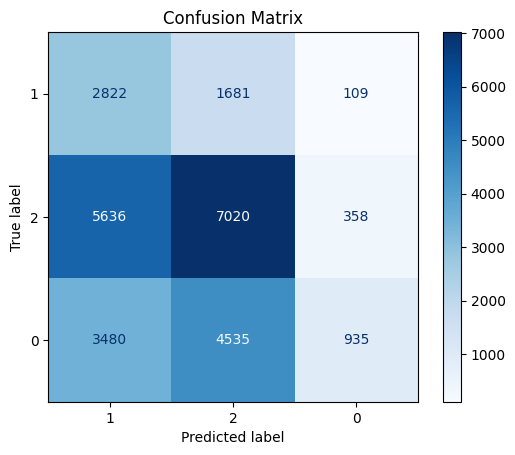

In [76]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming 'scoren_label' column might have NaN values
# Drop rows with NaN values in 'scoren_label'
train_df = train_df.dropna(subset=['scoren_label'])

# Check if there are any remaining NaN values
if train_df['scoren_label'].isnull().any():
    print("There are still NaN values in 'scoren_label'. Please handle them before calculating accuracy.")
else:
    # Calculate accuracy
    accuracy = accuracy_score(train_df['label'], train_df['scoren_label'])
    print(f"\nsentiwordnet ile Doğruluk Oranı: {accuracy:.2f}\n")
# Confusion matrix'i oluştur ve görselleştir
cm = confusion_matrix(train_df['label'], train_df['scoren_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_df['label'].unique())
disp.plot(cmap='Blues', values_format=".4g")
plt.title('Confusion Matrix')
plt.show()

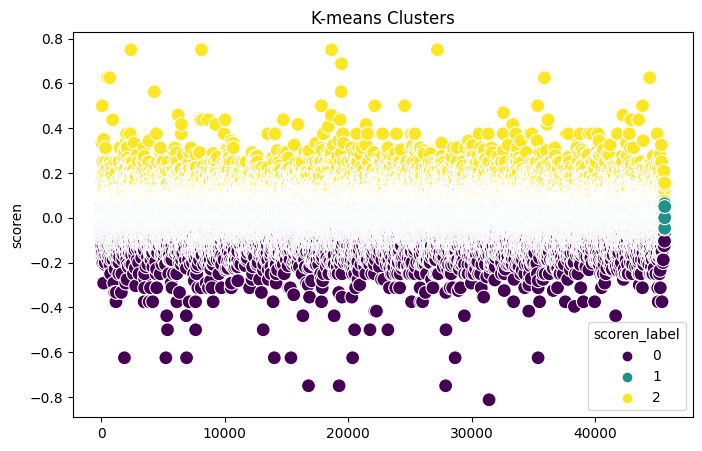

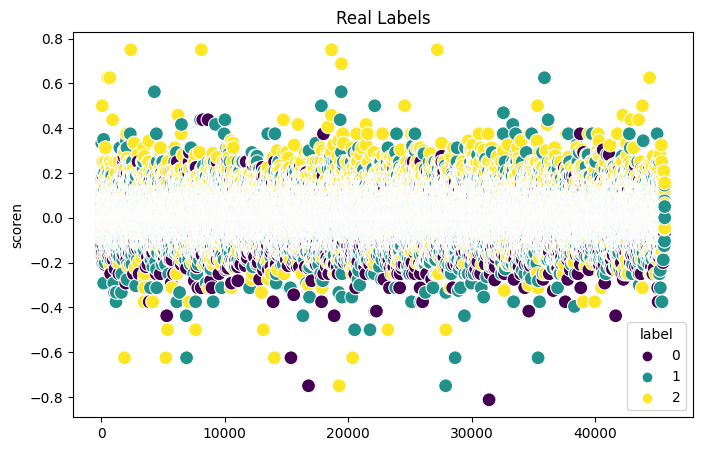

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional: for enhanced data visualization

# Assuming 'df' is your DataFrame with 'score', 'label', and 'score_label' columns

# Scatter plot for the 'score' data colored by K-means clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=range(45615), y=df['scoren'], hue=df['scoren_label'], palette='viridis', s=100)
plt.title('K-means Clusters')

# Scatter plot for the 'score' data colored by real labels
plt.figure(figsize=(8, 5))
sns.scatterplot(x=range(45615), y=df['scoren'], hue=df['label'], palette='viridis', s=100)
plt.title('Real Labels')

# Show the plots
plt.show()


In [ ]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Display the result
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ 0.00444064]
 [-0.11218886]
 [ 0.12707141]]


In [ ]:
# Assuming 'scored_tokens' is a column in your DataFrame
df['retext'] = df['scored_tokens'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, (list, tuple)) else '')

# Display the updated DataFrame
#print(df["retext"])

In [ ]:
!pip install tensorflow
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Veri setini yükleme
dfn = pd.read_parquet('sentiment_train_0000.parquet')
# Metin verisini sayılara dönüştürme
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dfn['text'])
X = tokenizer.texts_to_sequences(dfn['text'])
print(X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:




# Metin verisini sabit bir uzunlukta yapma
maxlen = 140
X = pad_sequences(X, maxlen=maxlen)

# Model oluşturma
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X, df['label'], epochs=5, batch_size=64)

# Modelin tüm veri seti üzerinde performansını değerlendirme
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis=1)

# Doğruluk hesapla
accuracy = accuracy_score(df['label'], y_pred)
print(f'Duygu analizi doğruluğu (TensorFlow): {accuracy * 100:.2f}%')

Epoch 1/5
713/713 [==============================] - 234s 321ms/step - loss: 0.8163 - accuracy: 0.6142
Epoch 2/5
713/713 [==============================] - 200s 280ms/step - loss: 0.5685 - accuracy: 0.7582
Epoch 3/5
713/713 [==============================] - 199s 279ms/step - loss: 0.3825 - accuracy: 0.8472
Epoch 4/5
713/713 [==============================] - 205s 287ms/step - loss: 0.2551 - accuracy: 0.9009
Epoch 5/5
1426/1426 [==============================] - 40s 28ms/step
Duygu analizi doğruluğu (TensorFlow): 96.11%



 LSTM ile Doğruluk Oranı: 0.96



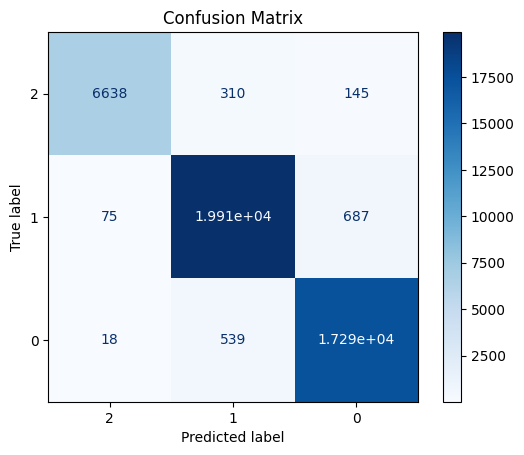

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Doğruluk oranını hesapla
accuracy = accuracy_score(df['label'], y_pred)
print(f"\n LSTM ile Doğruluk Oranı: {accuracy:.2f}\n")

# Confusion matrix'i oluştur ve görselleştir
cm = confusion_matrix(df['label'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['label'].unique())
disp.plot(cmap='Blues', values_format=".4g")
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df['predicted_label']=y_pred

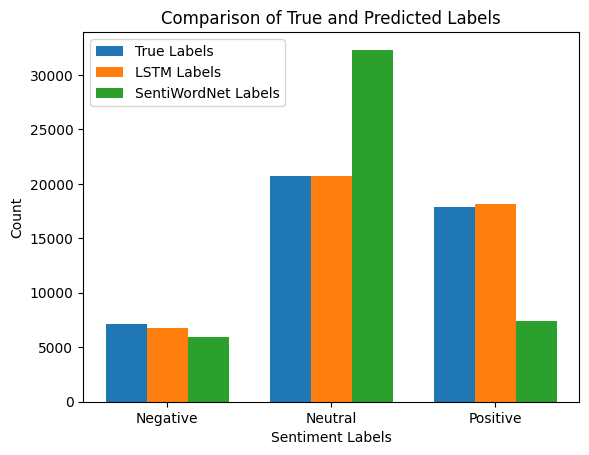

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'df' DataFrame with 'label', 'predicted_label', and 'scoren_label' columns

# Gerçek etiketlerin ve tahmin edilen etiketlerin dağılımını oluşturma
labels = ['Negative', 'Neutral', 'Positive']
true_counts = df['label'].value_counts().reindex([0, 1, 2], fill_value=0)
predicted_counts = df['predicted_label'].value_counts().reindex([0, 1, 2], fill_value=0)
sentiwordnet_score = df['scoren_label'].value_counts().reindex([0, 1, 2], fill_value=0).to_numpy()

# Çubuk grafik oluşturma
fig, ax = plt.subplots()

bar_width = 0.25
index = np.arange(len(labels))

bar1 = ax.bar(index, true_counts, bar_width, label='True Labels')
bar2 = ax.bar(index + bar_width, predicted_counts, bar_width, label='LSTM Labels')
bar3 = ax.bar(index + 2 * bar_width, sentiwordnet_score, bar_width, label='SentiWordNet Labels')

ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Count')
ax.set_title('Comparison of True and Predicted Labels')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
